<a href="https://colab.research.google.com/github/nicoavilan/Semillero-en-Computacion-Cuantica/blob/main/Qiskit_inicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semillero en Computación Cuántica

[Matematicas Aplicadas y Ciencias de la Computacion - MACC](https://urosario.edu.co/matematicas-aplicadas-y-ciencias-de-la-computacion-macc)

[Escuela de Ingenieria, Ciencia y Tecnologia](https://urosario.edu.co/escuela-de-ingenieria-ciencia-y-tecnologia)

[Universidad del Rosario](https://urosario.edu.co/)

## Definición de kets

**Tutorial**

[Basics of Quantum Information - Single systems](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

display(ket0 / 2 + ket1 / 2)

In [ ]:
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

display(ket0 / 2 + ket1 / 2)

In [ ]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

In [ ]:
#from numpy import matmul

display(np.matmul(M1, ket1))
display(np.matmul(M1, M2))
display(np.matmul(M2, M1))

## Simulación de una moneda

Hacemos una simulación del lanzamiento de una moneda para tener intuiciones respecto al las mediciones de los estados cuánticos.

In [ ]:
# En cada ejecución podemos tener un resultado diferente
np.random.choice(["Cara", "Sello"])

Examinamos el resultado de lanzar muchas monedas

In [ ]:
monedas = []
# probar con diferentes valores para evidenciar el comportamiento
# 10, 100, 1000, 10000
N = 10**2
for _ in range(N):
  monedas.append(np.random.choice(["Cara", "Sello"]))

#print(monedas)
pd.Series(monedas).value_counts()

In [ ]:
sns.histplot(monedas);

## Inicio Qiskit

In [ ]:
# instalo qiskit
%pip install qiskit --quiet

**Statevector** nos permite definir estados cuánticos y hacer algunas operaciones entre ellos.

Consultar [Statevector](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector)

### Estados cuánticos

In [ ]:
from qiskit.quantum_info import Statevector

In [ ]:
# Statevector es una función que define un estado cuántico a partir de dos números que en general son complejos.

u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

Visualizamos los estados con la notación de kets

In [ ]:
v.draw("latex")

Evaluamos el conjugado

In [ ]:
v.conjugate().draw("latex")

Los coeficientes nos dan información de la probabilidad de encontrar el sistema en cada estado (recordar [Regla de Born](https://en.wikipedia.org/wiki/Born_rule))

In [ ]:
v.probabilities()

Verificamos si un estado es válido o no. Observemos que el estado es válido si las probabilidades de los estados suman 1.

In [ ]:
# .isvalid() verufica si la norma del vector es 1.
display(u.is_valid())
display(w.is_valid())

In [ ]:
v.probabilities().sum()

In [ ]:
w.probabilities().sum()

### Medidas sobre los estados

Podemos medir hacer una medida para cada estado

In [ ]:
v.measure()

Observemos que en cada ejecución podemos tener un resultado diferente ... como en el caso del lanzamiento de monedas!

In [ ]:
v.measure()[0]

Ahora, para verificar la distribución de probabilidades hacemos un mayor número de experimentos y analizamos los resultados.

El histograma debería evidenciar la siguiente distribución de probabilidades:

In [ ]:
v.probabilities()

Esto se verifica en el histograma

{'0': 551, '1': 449}

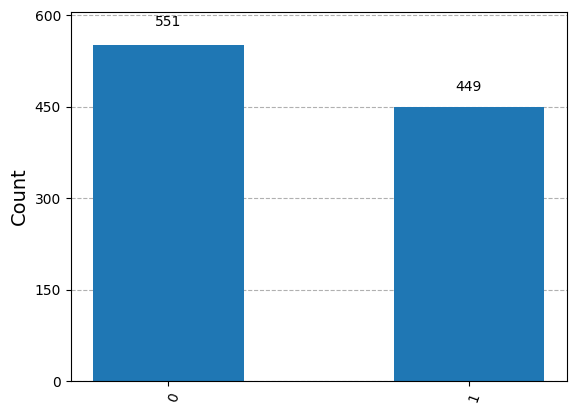

In [ ]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

El estado u se definió con igual probabilidad para $|0\rangle$ y $|1\rangle$.

In [ ]:
u.draw("latex")

In [ ]:
u.probabilities()

lo cual se verifica en el histograma

In [ ]:
statistics = u.sample_counts(10000)
display(statistics)
plot_histogram(statistics)